# Agenda

* Vector - In linear algebra its a direction which is computable 

* Matrix - 2-d array consisting values

* Linear Combination - In 2d, scaling two vectors and adding them like (ax+by) where x, y are vectors in 2d. The set of all possible vectors which we can reach by using the linear combination of two vectors is called the SPAN of x and y

* Linear Independence

* Linear Transformations - A transformation works exactly like function, where we enter a vector and the transformation gives us another vector which is modefied. It will linear if and only if:-
    * T(u+v)=T(u)+T(v)
    * T(cu)=cT(u)
    Think from a matrix vector multiplication point of view

* Determinant - The determinant is the “size” of the output transformation.It takes N vectors (the N columns of the matrix) and returns a number.If the input was a unit vector (representing area or volume of 1), the determinant is the size of the transformed area or volume. If two of the columns are linearly dependent, it will have a zero area.

* Eigen Values and Eigen Vectors - (Ax = Lambdax) Any vector such as x will be an eigen vector if we multiply x with a square matrix, it will give the vector itself scaled by a multiplier lambda

* Co-variance - The matrix which we multiply with eigenvector 

* Correlation - Standardized 

* Principal Component Analysis - 

# Why we need PCA

* Dimensinality Reduction
* Modeling Exercise
* EDA Part
* Multicolinearity

# Use case of PCA

* Kaggle competition Case Study
* https://www.kaggle.com/roydatascience/eda-pca-lgbm-santander-transactions?scriptVersionId=12759601

# Alternatives to PCA

* Simple Correlation 
* Variable Clustering
* Machine Learning Domain
    * Feature Importances
    * VIF - if Multicolinearity needs to be removed
    * RFE - Recursuve feature Elimination

# Quick Steps to build PCA

* Standarized the data
* Centering the data
* How many principal components we should expect from the data given? 
* It depends upon the variables we have with us, at most we can have Principal components equal to number of variables.but if there are fewer samples than variables then number of samples puts an upper bound on the number PCs with eigen values greater than 0

# Key questions to answer

* What will happen if we do not standardized the data?
* We need to remove the outliers? How they are impacting the PCA?
* Why we take transpose?
* PCA in excel- if available?
* What is Co-variance matrix?
* How Co-variance is coming into the picture here?
* What is Correlation matrix?
* How are we using them in PCA?
* What is an Eigenvector and Eigen values?

In [2]:
#Importing requisite libraries
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

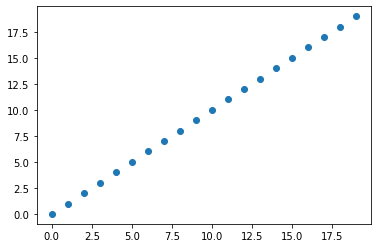

In [3]:
#Creating a cleaned dataset
np.random.seed(42)
X1_clean = np.array(range(20))
X2_clean = np.array(range(20))

#Plotting the points
plt.scatter(X1_clean, X2_clean)

In [4]:
X1_clean

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [5]:
X2_clean

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

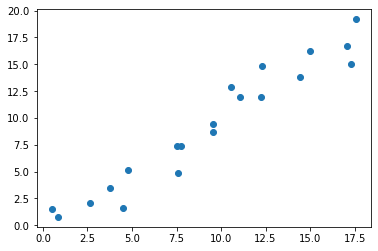

In [6]:
# Adding noise

X1_noise = np.random.randn(1,20)[0]
X2_noise = np.random.randn(1,20)[0]

X1 = X1_clean + X1_noise
X2 = X2_clean + X2_noise

data  = np.column_stack((X1,X2))

#Plotting the data
plt.scatter(X1,X2)

In [7]:
data

array([[ 0.49671415,  1.46564877],
       [ 0.8617357 ,  0.7742237 ],
       [ 2.64768854,  2.0675282 ],
       [ 4.52302986,  1.57525181],
       [ 3.76584663,  3.45561728],
       [ 4.76586304,  5.11092259],
       [ 7.57921282,  4.84900642],
       [ 7.76743473,  7.37569802],
       [ 7.53052561,  7.39936131],
       [ 9.54256004,  8.70830625],
       [ 9.53658231,  9.39829339],
       [10.53427025, 12.85227818],
       [12.24196227, 11.98650278],
       [11.08671976, 11.94228907],
       [12.27508217, 14.82254491],
       [14.43771247, 13.77915635],
       [14.98716888, 16.2088636 ],
       [17.31424733, 15.04032988],
       [17.09197592, 16.67181395],
       [17.5876963 , 19.19686124]])

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
data_compressed = pca.fit_transform(data)

In [9]:
data_compressed

array([[-11.70209097,  -1.18858478],
       [-11.96054501,  -0.45067499],
       [ -9.79766023,  -0.0214973 ],
       [ -8.88269333,   1.68791099],
       [ -8.01959833,  -0.14625578],
       [ -6.12605298,  -0.53939002],
       [ -4.40412692,   1.70081257],
       [ -2.42416179,   0.11988374],
       [ -2.56798501,  -0.06985492],
       [ -0.23983549,   0.51438752],
       [  0.26181877,   0.04061439],
       [  3.47210862,  -1.57785132],
       [  3.99927199,   0.26276757],
       [  3.18096521,  -0.55388054],
       [  6.10045881,  -1.6422904 ],
       [  6.80693221,   0.65260064],
       [  8.96155785,  -0.59758655],
       [  9.68817959,   1.90297059],
       [ 10.73275437,   0.63017508],
       [ 12.92070264,  -0.72425647]])

In [10]:
pca.explained_variance_ratio_

array([0.98410549, 0.01589451])

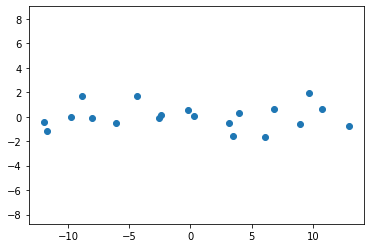

In [11]:
plt.axis('equal')
plt.scatter(data_compressed[:,0], data_compressed[:,1])

In [12]:
pca.components_

array([[ 0.68029065,  0.73294245],
       [ 0.73294245, -0.68029065]])

- The direction of the arrows represent the principal components and their relative lengths represent the proportion of variance explained by the components.

- The principal components are basically the projections of all the points along the direction of the principal component. We can intuitively see that the projection along the first principal component (the longer vector in the diagram) explains most of our data. The second principal component is mostly catering to the noise that we introduced into the data.

- The two components are the projections of all the points in the original dataset taken along the lines:

- 0.68029 X1 + 0.7329 X2 (which is approximately the y = X line). The reason it is not exactly the y=X axis is because of the random noise that has skewed the data a little 0.7329 X1 - 0.68029 X2
- We can see that the two lines above along which the projections are taken in order to get the principal components are perpendicular (product of their slopes is -1). This property of PCA insures independence between the components

# Dimensionality reduction: PCA with one principal component

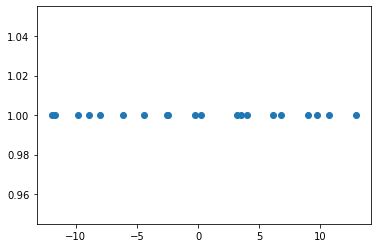

In [17]:
pca = PCA(n_components = 1)
data_compressed = pca.fit_transform(data)
plt.scatter(data_compressed, [1]*20)

In [18]:
data_compressed

array([[-11.70209097],
       [-11.96054501],
       [ -9.79766023],
       [ -8.88269333],
       [ -8.01959833],
       [ -6.12605298],
       [ -4.40412692],
       [ -2.42416179],
       [ -2.56798501],
       [ -0.23983549],
       [  0.26181877],
       [  3.47210862],
       [  3.99927199],
       [  3.18096521],
       [  6.10045881],
       [  6.80693221],
       [  8.96155785],
       [  9.68817959],
       [ 10.73275437],
       [ 12.92070264]])

In [21]:
data_compressed.T

array([[-11.70209097, -11.96054501,  -9.79766023,  -8.88269333,
         -8.01959833,  -6.12605298,  -4.40412692,  -2.42416179,
         -2.56798501,  -0.23983549,   0.26181877,   3.47210862,
          3.99927199,   3.18096521,   6.10045881,   6.80693221,
          8.96155785,   9.68817959,  10.73275437,  12.92070264]])

In [20]:
data_compressed.shape

(20, 1)

In [19]:
pca.components_

array([[0.68029065, 0.73294245]])

* https://www.linkedin.com/pulse/feature-engineering-key-predictive-modeling-karan-rajwanshi/
* https://www.linkedin.com/pulse/understanding-pca-part-2-high-dimensional-data-karan-rajwanshi/
* https://www.linkedin.com/pulse/understanding-pca-part-1-intuition-karan-rajwanshi/
* https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
* https://setosa.io/ev/principal-component-analysis/
* http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf
* https://towardsdatascience.com/intuition-behind-principal-components-849d3ef9d616
* https://towardsdatascience.com/principal-component-analysis-math-and-intuition-post-1-d44bf32844f3
* https://medium.com/swlh/intuition-behind-principal-component-analysis-you-ever-wanted-to-understand-af1b8c1ea801
* https://intuitive-math.club/linear-algebra/eigenvalues/